In [1]:
%load_ext autoreload
%autoreload 2

#import pyranges as pr
import pandas as pd
import numpy as np
import seaborn as sns
#from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, f1_score
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from glob import glob

# Get the dataframes from google drive

In [2]:
data_dir = '/s/project/mll/sergey/effect_prediction/MLM/ML4RG_project/'

In [5]:
!pip -q install gdown

In [6]:
!mkdir -p {data_dir}/students_data
!gdown "https://drive.google.com/uc?export=download&id=13HI0Xks5o1WRW2_tBhOAQaroTQQHNmvs" -O {data_dir}/students_data/part1_full_df_10.parquet
!gdown "https://drive.google.com/uc?export=download&id=1yiqtBlW1V2keSBV7wdJs3EptEPp2Kywb" -O {data_dir}/students_data/part2_full_df_70.parquet

100%|████████████████████████████████████████| 217M/217M [00:03<00:00, 60.8MB/s]


In [14]:
model_df = pd.read_parquet(data_dir + "students_data/models/part1_full_df_10.parquet")
#conservation_df = pd.read_parquet(data_dir + "students_data/conservation/part2_full_df_70.parquet")

In [4]:
model_df

,motif_range,motif,Model,avg_target_probas
0,"[1605252, 1605257]",non_motif,Dinucleotide distribution,0.233960
1,"[1941273, 1941278]",non_motif,Dinucleotide distribution,0.262573
2,"[1292064, 1292069]",non_motif,Dinucleotide distribution,0.211055
3,"[214575, 214580]",non_motif,Dinucleotide distribution,0.267305
4,"[648096, 648101]",non_motif,Dinucleotide distribution,0.262628
...,...,...,...,...
314527,"[3035729, 3035734]",KHDRBS2,11-mer,0.328480
314528,"[3035807, 3035812]",KHDRBS2,11-mer,0.474767
314529,"[3036473, 3036478]",KHDRBS2,11-mer,0.349645
314530,"[3036554, 3036559]",KHDRBS2,11-mer,0.285160


## Aesthetics

In [5]:

sns.set_theme()
sns.set_context("talk", font_scale=1.7)#, rc={"font.size": 7})
sns.set_style(style={'xtick.bottom': True,'ytick.left': True, 'axes.edgecolor': 'black'})

In [6]:
conservation_df.head()

NameError: name 'conservation_df' is not defined

## Part 1

In [7]:
model_df.head()

,motif_range,motif,Model,avg_target_probas
0,"[1605252, 1605257]",non_motif,Dinucleotide distribution,0.233960
1,"[1941273, 1941278]",non_motif,Dinucleotide distribution,0.262573
2,"[1292064, 1292069]",non_motif,Dinucleotide distribution,0.211055
3,"[214575, 214580]",non_motif,Dinucleotide distribution,0.267305
4,"[648096, 648101]",non_motif,Dinucleotide distribution,0.262628


In [8]:
motifs = pd.read_excel(data_dir + '../dominguez_2018/1-s2.0-S1097276518303514-mmc4.xlsx',
             sheet_name =1, skiprows=1)

top_motifs = motifs.iloc[0,0::2]

In [15]:
model_df.motif = model_df.motif.apply(lambda x: f'{x} ({top_motifs.loc[x]})' if x in top_motifs.index else x)

### Create Model comparison

/data/ouga/home/ag_gagneur/l_vilov/miniconda3/envs/svilov-python/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PABPN1L (AAAAA)_Species-aware vs. PABPN1L (AAAAA)_Species-agnostic: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:0.000e+00 Stat=1.215e+07
TRA2A (GAAGA)_Species-aware vs. TRA2A (GAAGA)_Species-agnostic: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.332e-46 Stat=3.130e+06
PCBP2 (CCCCC)_Species-aware vs. PCBP2 (CCCCC)_Species-agnostic: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:5.607e-126 Stat=7.021e+05
RBFOX2 (GCATG)_Species-aware vs. RBFOX2 (GCATG)_Species-agnostic: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.076e-62 Stat=1.215e+06
TARDBP (GTATG)_Species-aware vs. TARDBP (GTATG)_Species-agnostic: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:3.183e-02 Stat=1.319e+06


<Figure size 640x480 with 0 Axes>

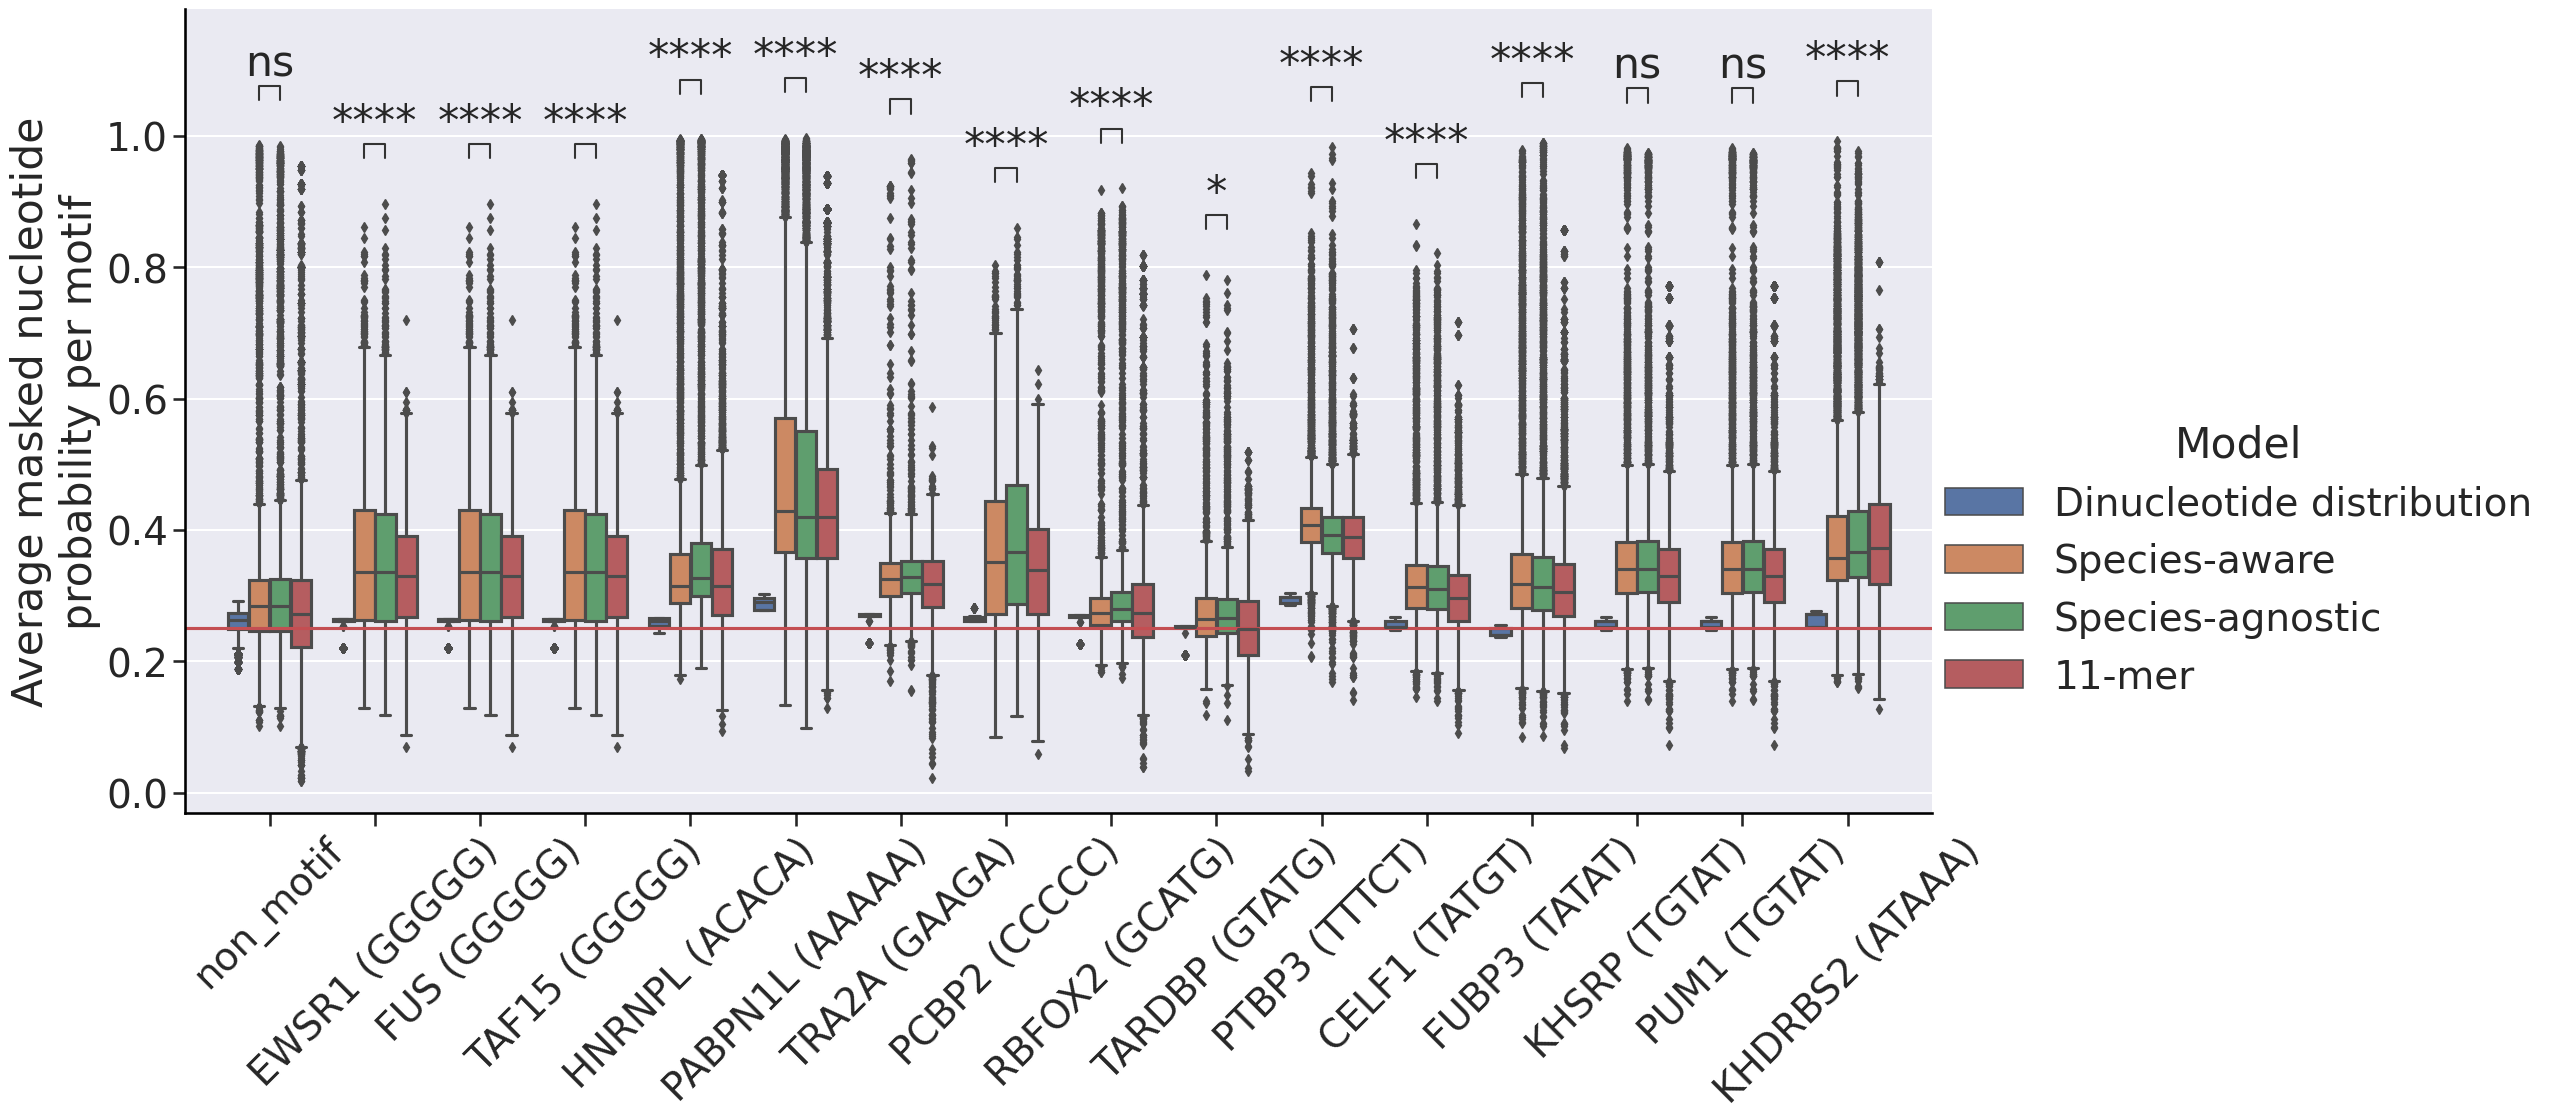

In [16]:

plt.clf()
plot_significance = True

order = list(model_df["motif"].unique())
labels = order
mots = order

mods = [#("Dinucleotide distribution", "Species-agnostic"),
        #("Species-agnostic","Species-aware"),
        #("Dinucleotide distribution", "Species-aware"),
        #("Dinucleotide distribution", "Species-unaware"),
        #("11-mer","Species-aware"),
        #("11-mer","Species-agnostic"),
        ("Species-aware", "Species-agnostic"),
        #("Dinucleotide distribution", "11-mer"),
        ]


g = sns.catplot(data=model_df, x="motif", y="avg_target_probas", hue="Model",kind="box", height=10, aspect=2.0,
           order=order, estimator=np.mean)#, palette=custom_colors)

plt.xticks(rotation = 45, ticks = range(0,len(order)),labels=labels)

if plot_significance:
    pairs=[]

    for m in mots:
        for mod in mods:
            pairs.append(((m,mod[0]),(m,mod[1])))

    for ax_n in g.axes:
        for ax in ax_n:
            annotator = Annotator(ax, pairs, data=model_df, x="motif", y="avg_target_probas", hue="Model")
            annotator.configure(test='Wilcoxon', text_format='star', loc='inside', comparisons_correction="BH")
            annotator.apply_and_annotate()

# plot red horizontal line at 0.25
plt.axhline(0.25,color="r")
#plt.title("Comparing Motif Reconstruction Abilities\nAcross Different Models for Selected RBPs\n", fontsize=46)

plt.xlabel("")
plt.ylabel("Average masked nucleotide\nprobability per motif")
plt.show()

### Random vs. other motifs

('Species-aware', 'non_motif')
----------------
('Species-aware', 'EWSR1')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'FUS')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'TAF15')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'HNRNPL')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'PABPN1L')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'TRA2A')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'PCBP2')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'RBFOX2')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'TARDBP')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'PTBP3')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'CELF1')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'FUBP3')
('Species-aware', 'non_motif')
----------------
('Species-aware', 'KHSRP')
('Species-aware', 'non

<Figure size 640x480 with 0 Axes>

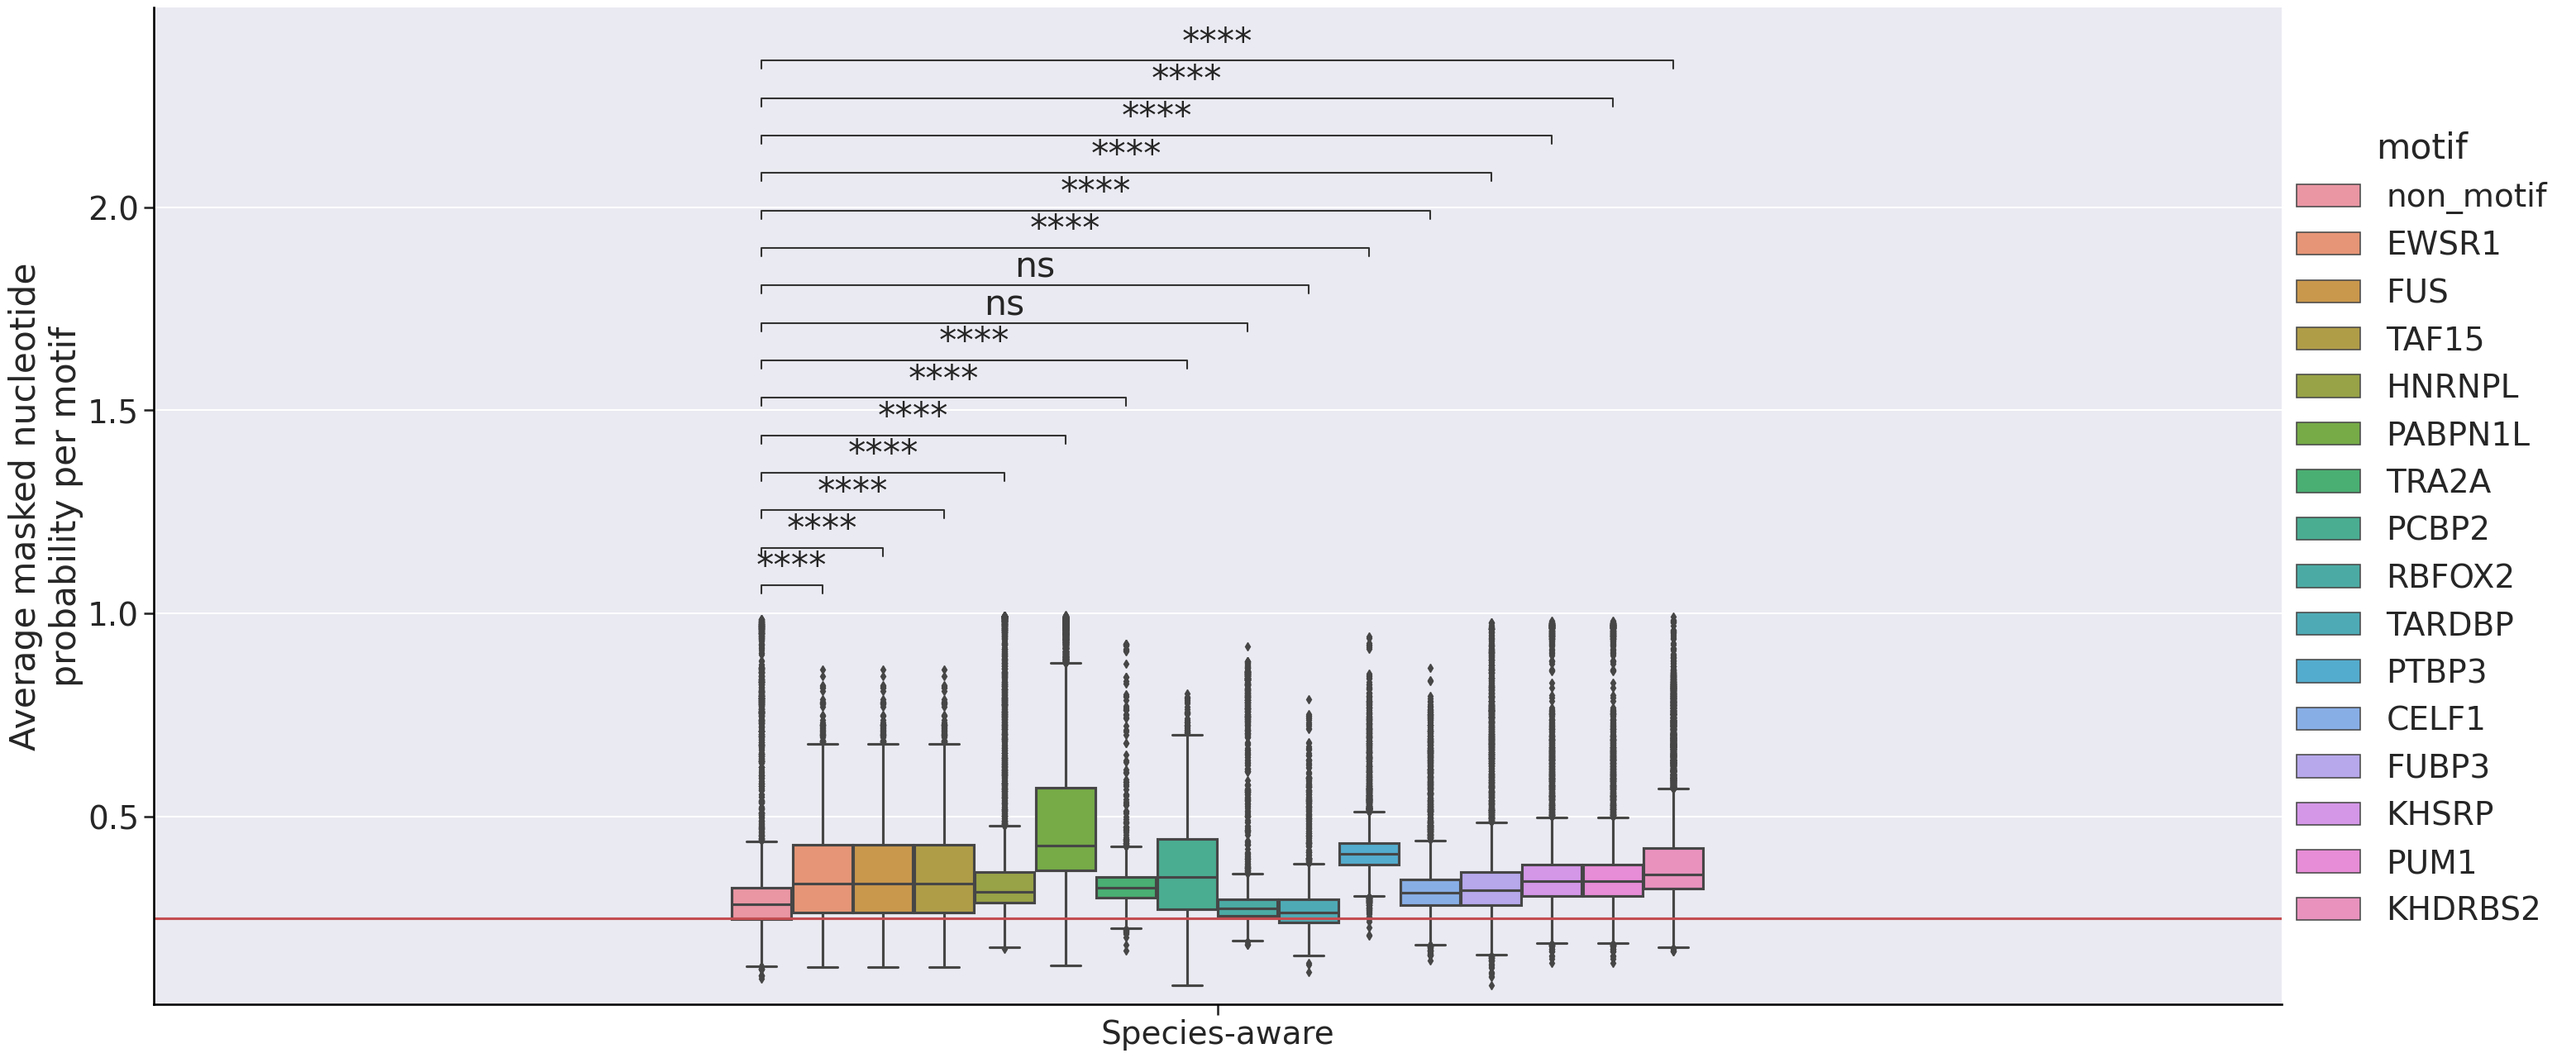

In [9]:

plt.clf()
plot_significance = True

order = ["Species-aware"]

labels = order
mots = order

motifs = list(model_df["motif"].unique())

mods = [("non_motif", motif) for motif in motifs]

mods_tmp = []
for m1, m2 in mods:
    if m1 != m2:
        mods_tmp.append((m1,m2))

mods = mods_tmp
    

g = sns.catplot(data=model_df, x="Model", y="avg_target_probas", hue="motif",kind="box", height=14, aspect=2.0,
           order=order, estimator=np.mean)#, palette=custom_colors)

if plot_significance:
    pairs = [(("Species-aware", motif1), ("Species-aware", motif2)) for motif1, motif2 in mods]
    for ax_n in g.axes:
        for ax in ax_n:
            annotator = Annotator(ax, pairs, data=model_df, x="Model", y="avg_target_probas", hue="motif", order=order)
            annotator.configure(test='Mann-Whitney-ls', text_format='star', loc='inside', comparisons_correction="BH")
            annotator.apply_and_annotate()

plt.axhline(0.25, color="r")


plt.xlabel("")
plt.ylabel("Average masked nucleotide\nprobability per motif")
plt.show()

# Part 2

First group by the motifs and calculate the mean of the conservation/entropy => each motifs has one avg conservation score and average entropy

In [10]:
grouped_conservation_df = conservation_df.groupby("alphabet_seq")[["shanon_entropy","conserv_rate","avg_target_probas"]].mean().sort_values(by=["conserv_rate"], ascending=False)
grouped_conservation_df.head()

,shanon_entropy,conserv_rate,avg_target_probas
alphabet_seq,,,
ACTTA,1.521928,0.409550,0.245231
ACGCG,1.521928,0.395775,0.211695
TCCGG,1.521928,0.388860,0.233067
GGTCG,1.370951,0.385963,0.228689
GCGTA,1.921928,0.385286,0.177037


## Entropy

<Figure size 640x480 with 0 Axes>

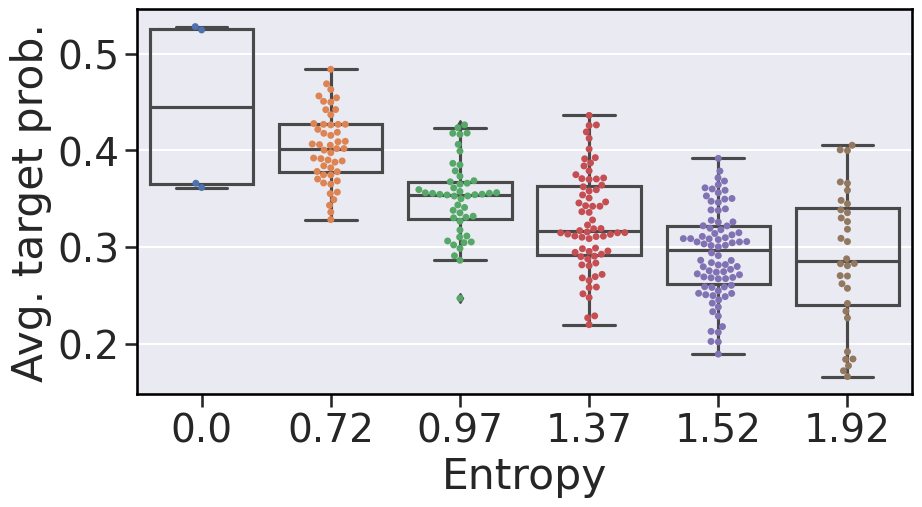

In [11]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
# mean() introduced some rounding errors -> round to 2 digits
ax = sns.swarmplot(x=grouped_conservation_df["shanon_entropy"].round(2), y=grouped_conservation_df["avg_target_probas"])
ax = sns.boxplot(x=grouped_conservation_df["shanon_entropy"].round(2), y=grouped_conservation_df["avg_target_probas"] ,boxprops={'facecolor':'None'})
ax.set_xlabel("Entropy")
ax.set_ylabel("Avg. target prob.")
plt.show()

## Mixed conservation score and entropy

<Figure size 640x480 with 0 Axes>

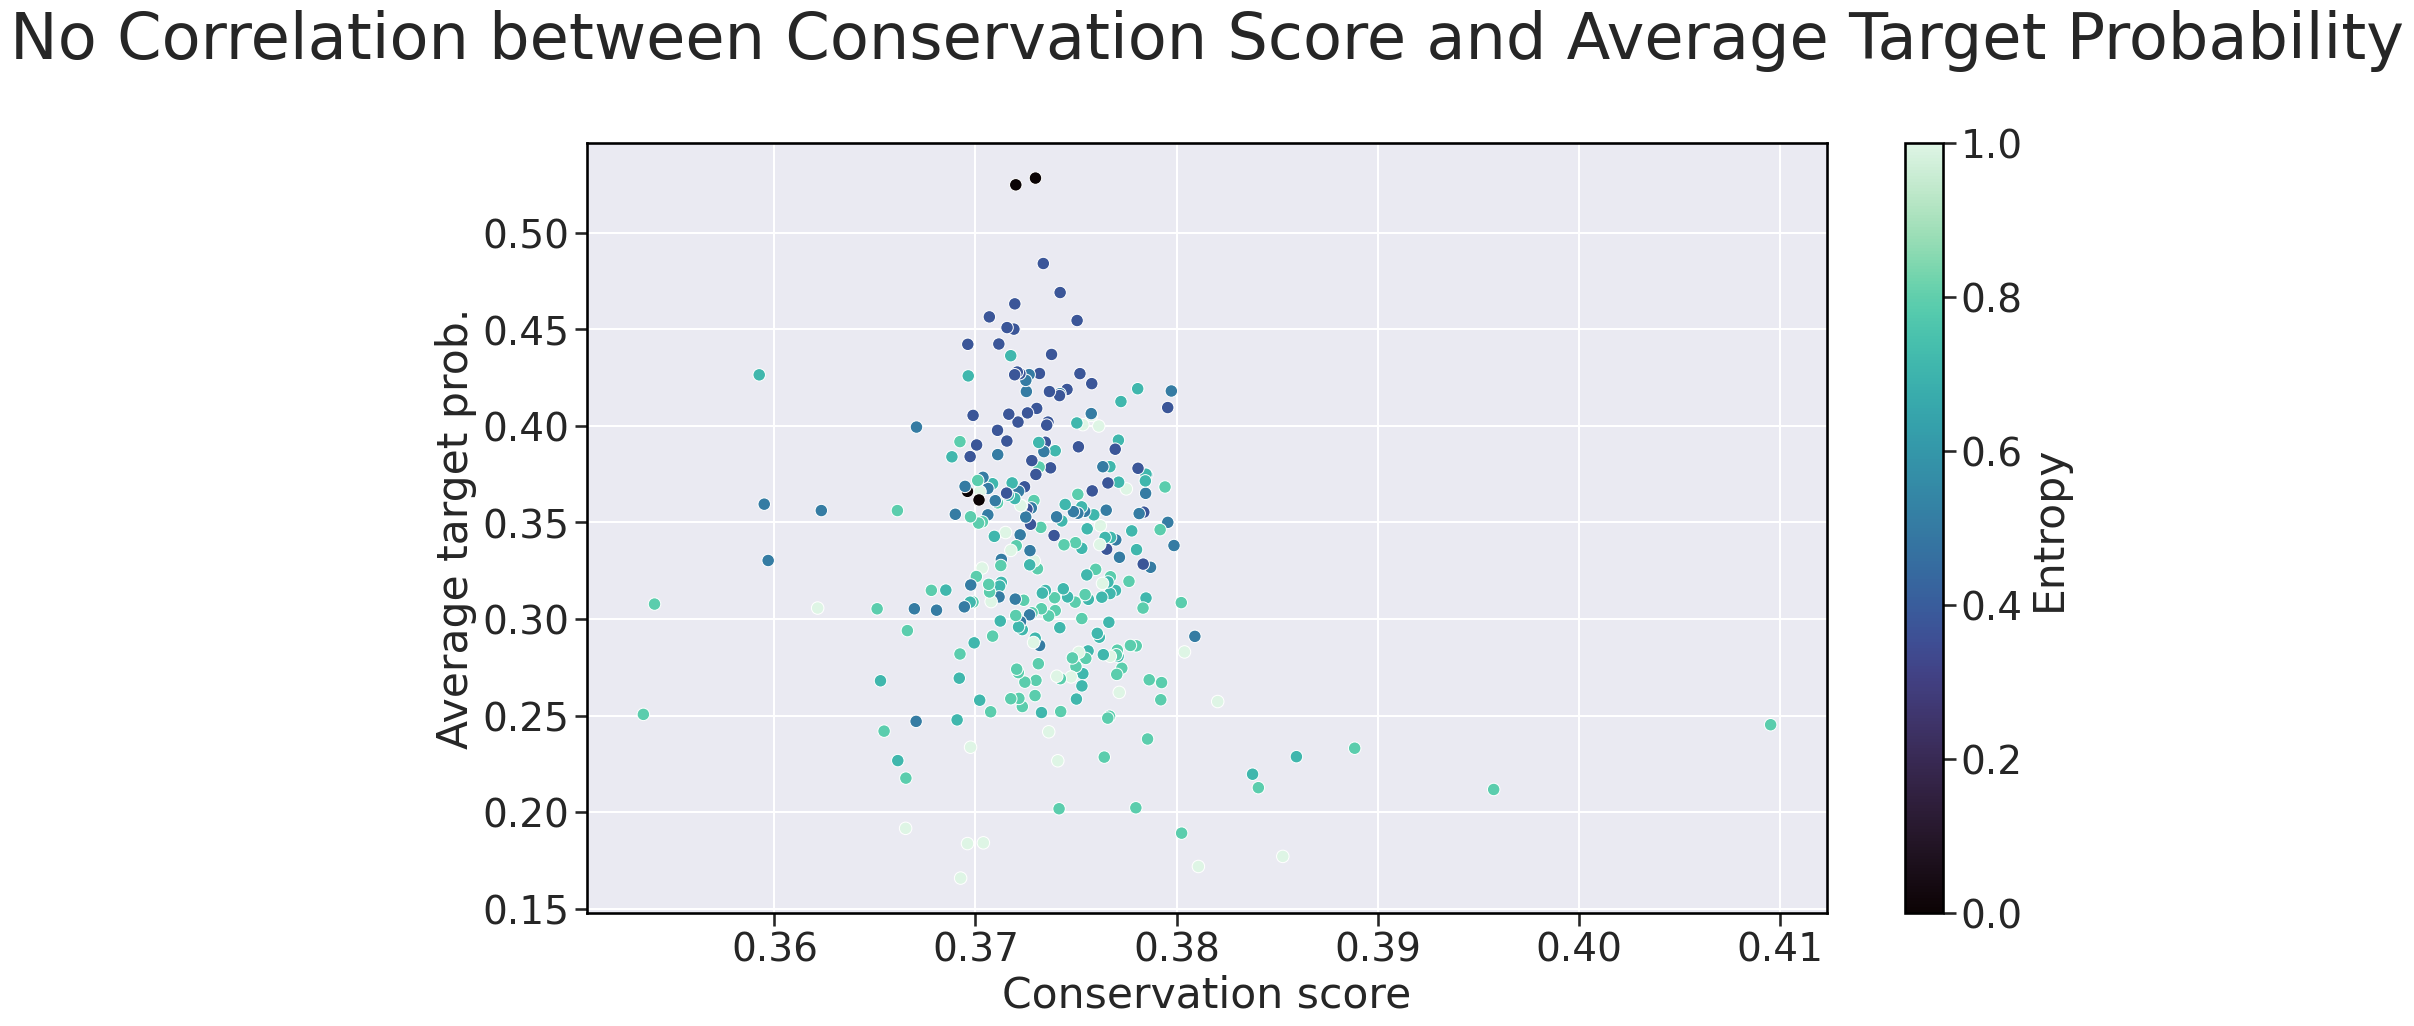

In [12]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data = grouped_conservation_df, x="conserv_rate", y="avg_target_probas", hue="shanon_entropy", palette="mako")
sm = plt.cm.ScalarMappable(cmap="mako")
ax.set_title("No Correlation between Conservation Score and Average Target Probability\n", fontsize=46)
ax.set_xlabel("Conservation score")
ax.set_ylabel("Average target prob.")
ax.get_legend().remove()
cb = ax.figure.colorbar(sm, ax=ax)
cb.set_label('Entropy')
plt.show()

Check outlier proteins

In [13]:
# get motifs that have a high conservation score
outlier_motifs = list(grouped_conservation_df[grouped_conservation_df["conserv_rate"] > 0.385].index)
outlier_motifs_df = conservation_df.loc[conservation_df["alphabet_seq"].isin(outlier_motifs)]

# get the corresponding proteins from the original dataframe
proteins = list(outlier_motifs_df["motif"].unique())
proteins.remove("non_motif")

# map protein names to motifs
outlier_motifs_df = outlier_motifs_df.loc[outlier_motifs_df["motif"].isin(proteins)]
outlier_motifs_df[["motif", "alphabet_seq"]].drop_duplicates().reset_index(drop=True)

,motif,alphabet_seq
0,RBM22_3,TCCGG
1,RBM4_4,GCGTA
2,EIF4G2_5,GGTCG
3,RBM4B_10,ACGCG
4,RBM45_13,ACGCG


## Only conservation (Scatter plot + heatmaps)

In [14]:
# get top k motifs
all_motifs = list(conservation_df["motif"].unique())
all_motifs.remove("non_motif")
print(all_motifs)

motif_to_seq = conservation_df[["motif","alphabet_seq"]].drop_duplicates()
motif_to_seq = motif_to_seq[motif_to_seq["motif"] != "non_motif"]
motif2seq = motif_to_seq.set_index("motif",drop=True).to_dict()["alphabet_seq"]

# k can be adjusted to get the next top motifs
top_k = 1

# the numbers at the end of the protein name correspond to the row number in table 3
# => the top motif therefore doesn't start at 0 but at 2
nums = sorted(list(set(map(lambda x: int(x.split("_")[-1]), all_motifs))))
nums = nums[:top_k]
# find all motifs which end with "_num" where num is from nums
top_k_motifs = list(filter(lambda x: int(x.split("_")[-1]) in nums, all_motifs))
# group top_k_motifs by string before _num
top_k_dict = {}
for motif in top_k_motifs:
    mot = "".join(motif.split("_")[:-1])
    #print(mot)
    if motif.split("_")[0] not in top_k_dict:
        top_k_dict[mot] = [motif]
    else:
        top_k_dict[mot].append(motif)

['BOLL_2', 'CELF1_2', 'CNOT4_2', 'CPEB1_2', 'DAZ3_2', 'DAZAP1_2', 'EIF4G2_2', 'ELAVL4_2', 'ESRP1_2', 'EWSR1_2', 'FUBP1_2', 'FUBP3_2', 'FUS_2', 'HNRNPA0_2', 'HNRNPA2B1_2', 'HNRNPC_2', 'HNRNPCL1_2', 'HNRNPD_2', 'HNRNPDL_2', 'HNRNPF_2', 'HNRNPH2_2', 'HNRNPK_2', 'HNRNPL_2', 'IGF2BP1_2', 'IGF2BP2_2', 'ILF2_2', 'KHDRBS2_2', 'KHDRBS3_2', 'KHSRP_2', 'MBNL1_2', 'MSI1_2', 'NOVA1_2', 'NUPL2_2', 'PABPN1L_2', 'PCBP1_2', 'PCBP2_2', 'PCBP4_2', 'PRR3_2', 'PTBP3_2', 'PUF60_2', 'PUM1_2', 'RALY_2', 'RBFOX2_2', 'RBFOX3_2', 'RBM15B_2', 'RBM22_2', 'RBM23_2', 'RBM24_2', 'RBM25_2', 'RBM4_2', 'RBM41_2', 'RBM45_2', 'RBM47_2', 'RBM4B_2', 'RBM6_2', 'RBMS2_2', 'RBMS3_2', 'RC3H1_2', 'SF1_2', 'SFPQ_2', 'SNRPA_2', 'SRSF10_2', 'SRSF11_2', 'SRSF2_2', 'SRSF4_2', 'SRSF5_2', 'SRSF8_2', 'SRSF9_2', 'TAF15_2', 'TARDBP_2', 'TIA1_2', 'TRA2A_2', 'TRNAU1AP_2', 'UNK_2', 'ZCRB1_2', 'ZFP36_2', 'ZNF326_2', 'A1CF_3', 'BOLL_3', 'CELF1_3', 'CNOT4_3', 'CPEB1_3', 'DAZ3_3', 'DAZAP1_3', 'EIF4G2_3', 'ELAVL4_3', 'ESRP1_3', 'EWSR1_3', 'FUBP1_

PABPN1L
['PABPN1L_2']


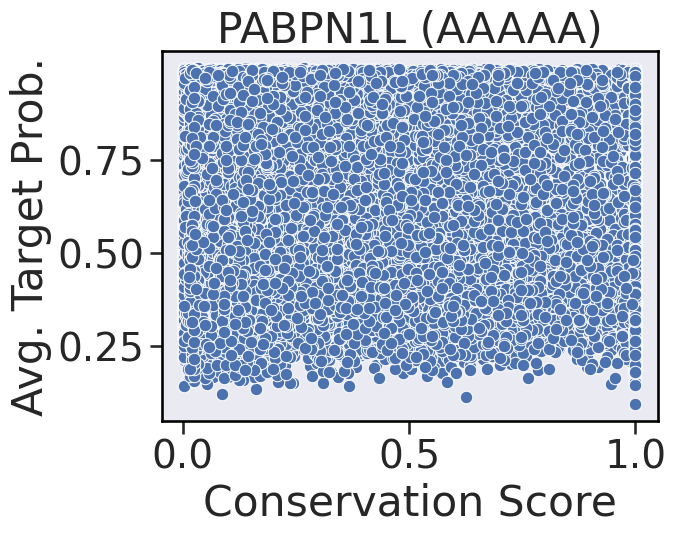

HNRNPC
['HNRNPC_2']


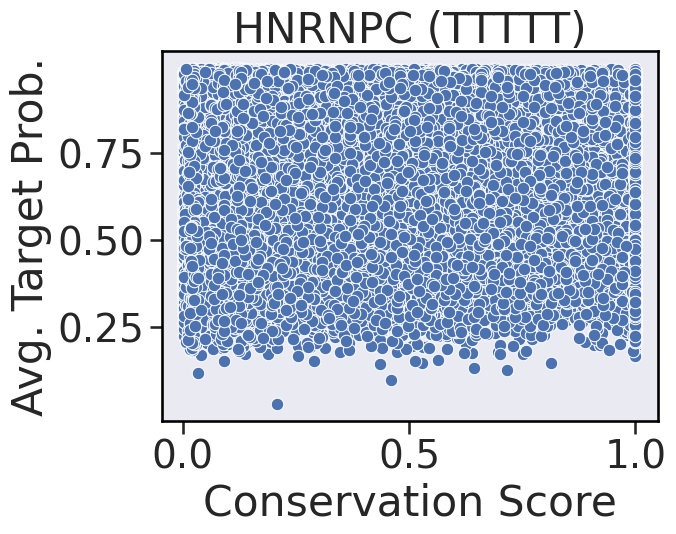

TIA1
['TIA1_2']


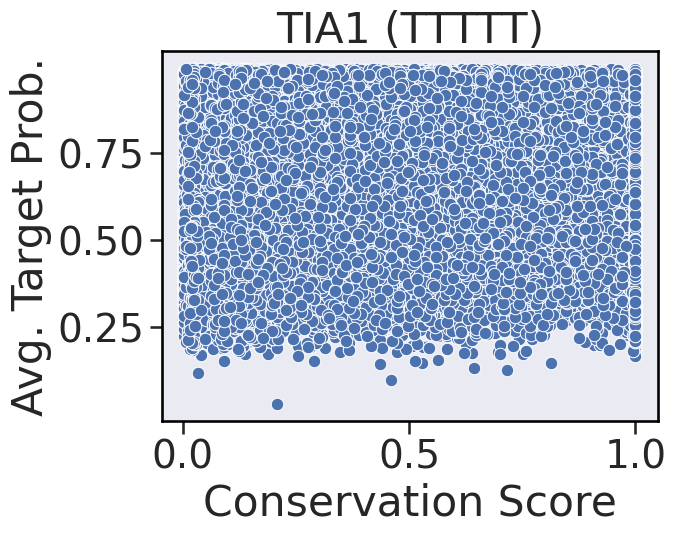

In [41]:

#for motif in top_k_dict:
#for motif in ["TARDBP", "RBFOX2", "CELF1"]:
for motif in ["PABPN1L", "HNRNPC", "TIA1"]:
    print(motif) 
    print(top_k_dict[motif])
    top_k_motifs_df = conservation_df.loc[conservation_df["motif"].isin(top_k_dict[motif])]
    top_k_motifs_df = top_k_motifs_df[["conserv_rate","avg_target_probas"]].reset_index()
    plt.clf()
    sns.scatterplot(data=top_k_motifs_df, x="conserv_rate", y="avg_target_probas")
    plt.title(f"{motif} ({motif2seq[top_k_dict[motif][0]]})")
    plt.xlabel('Conservation Score')
    plt.ylabel('Avg. Target Prob.')
    plt.yticks([0.25, 0.5, 0.75])
    plt.xticks([0,0.5,1])
    plt.grid()
    plt.show()

## Heatmap

PABPN1L
['PABPN1L_2']


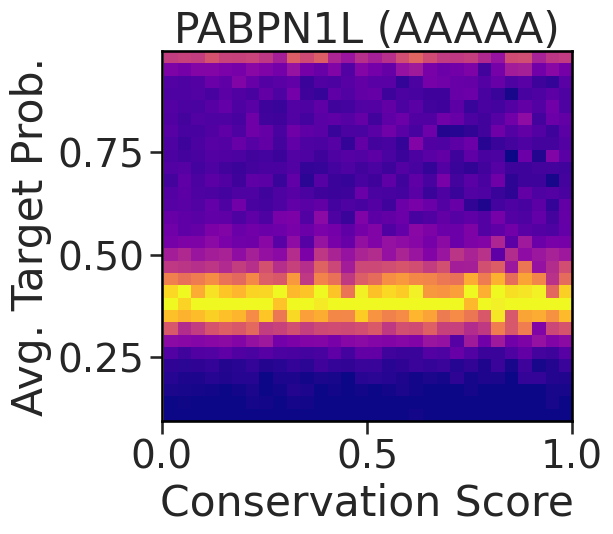

HNRNPC
['HNRNPC_2']


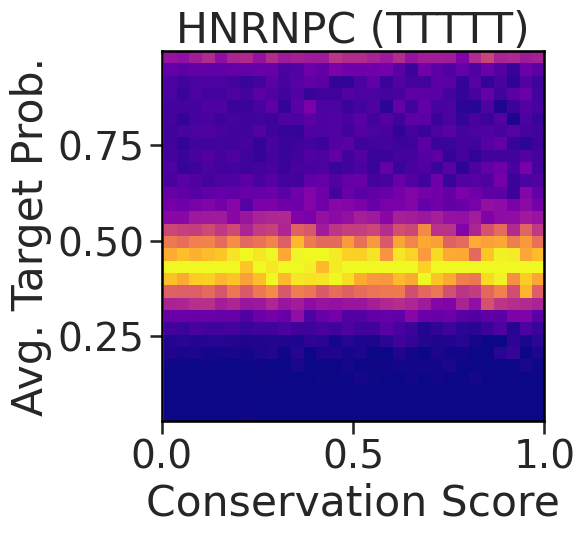

TIA1
['TIA1_2']


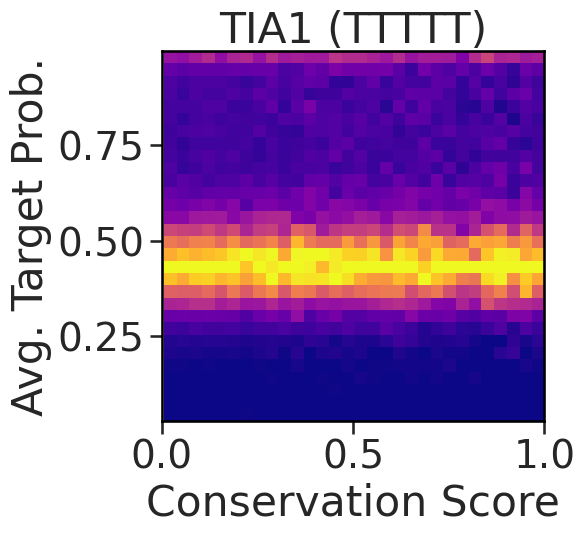

In [15]:

import sklearn
plt.clf()
plt.rcParams.update({'font.size': plt.rcParamsDefault['font.size']})
#for motif in top_k_dict:
#for motif in ["TARDBP", "RBFOX2", "CELF1"]:
for motif in ["PABPN1L", "HNRNPC", "TIA1"]:
    print(motif)
    print(top_k_dict[motif])

    # get lines where top_k_dict[motif] is in motif_conservation_df["motif"]
    top_k_motifs_df = conservation_df.loc[conservation_df["motif"].isin(top_k_dict[motif])]
    top_k_motifs_df = top_k_motifs_df[["conserv_rate","avg_target_probas"]].reset_index()

    scaler = sklearn.preprocessing.MinMaxScaler()
    x = top_k_motifs_df["conserv_rate"].to_numpy()
    y = top_k_motifs_df["avg_target_probas"].to_numpy()
    hist, xedges, yedges = np.histogram2d(x, y, bins=30)
    hist = scaler.fit_transform(hist.T)

    plt.clf()
    # grid here as it puts the grid behind the img otherwise it would be shown
    plt.grid()
    plt.imshow(hist, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='plasma')
    plt.title(f"{motif} ({motif2seq[top_k_dict[motif][0]]})")
    plt.xlabel('Conservation Score')
    plt.ylabel('Avg. Target Prob.')
    plt.yticks([0.25, 0.5, 0.75])
    plt.xticks([0,0.5,1])
    plt.show()